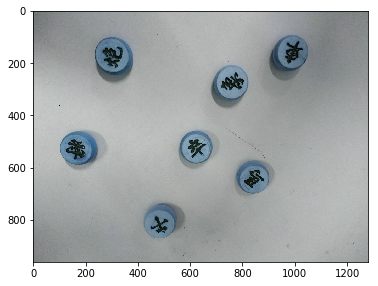

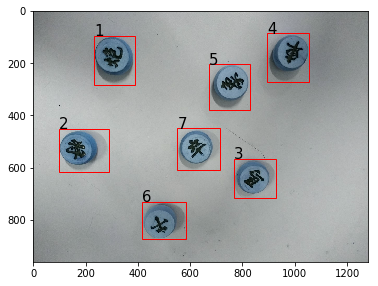

In [2]:
import cv2,os
import selectivesearch
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

n = 1
imagename = 'duotu.jpg'
#用cv2读取图片
img = cv2.imread(imagename)
#白底黑字图 改为黑底白字图
# img=255-img
#selectivesearch 调用selectivesearch函数 对图片目标进行搜索
img_lbl, regions =selectivesearch.selective_search(
img, scale=500, sigma=0.9, min_size=20)
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
# for x, y, w, h in regions:
#     image_position = (x+w/2,y+h/2)
#     rect = mpatches.Rectangle(
#     (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
#     ax.add_patch(rect)
#     ax.text(x, y, str(n),fontsize=15)
#     crop_imgae = img[y:y+h,x:x+w]
#     cv2.imwrite('./data/'+str(n)+'.jpg',crop_imgae)
#     n += 1
plt.show()

candidates = set()
for r in regions:
    # 去除相同的框
    if r['rect'] in candidates:
        continue
    # 去除小框和大框
#     if r['size'] < 10000 or r['size']>20000:
    if r['size'] < 2000 or r['size']>20000:
        continue
    # distorted rects
    x, y, w, h = r['rect']
    if w / h > 1.2 or h / w > 2:
        continue
    candidates.add(r['rect'])

num_array=[]
for i in candidates:
    if len(num_array)==0:
        num_array.append(i)
    else:
        content=False
        replace=-1
        index=0
    for j in num_array:
        ##新窗口在小圈 则滤除
        if i[0]>=j[0] and i[0]+i[2]<=j[0]+j[2] and i[1]>=j[1] and i[1]+i[3]<=j[1]+j[3]:
            content=True
            break
        ##新窗口不在小圈 而在老窗口外部 替换老窗口
        elif i[0]<=j[0] and i[0]+i[2]>=j[0]+j[2] and i[1]<=j[1] and i[1]+i[3]>=j[1]+j[3]:
            replace=index
            break
        index+=1
    if not content:
        if replace>=0:
            num_array[replace]=i
        else:
            num_array.append(i)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))
ax.imshow(img)
for x, y, w, h in num_array:
    image_position = (x+w/2,y+h/2)
    print(image_position)
    rect = mpatches.Rectangle(
    (x, y), w, h, fill=False, edgecolor='red', linewidth=1)
    ax.add_patch(rect)
    ax.text(x, y, str(n),fontsize=15)
#     crop_imgae = img[y:y+h,x:x+w]
#     cv2.imwrite('./data/'+str(n)+'.jpg',crop_imgae)
    n += 1
plt.show()